In [ ]:
QUANTITATIVE CASE STUDIES COURSE - CASE STUDY 3: Parfois- Sprint 1


Team members:

André Costa

Catarina Monteiro

João Monteiro

Luis Ferreira

Rodrigo Soares

Telmo Barbosa

In [13]:
#Importing and reading data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)

df = pd.read_csv("df_product.csv", low_memory=False)

df.columns = df.columns.str.strip()

print("Shape:", df.shape)
display(df.head())
df.info()

Shape: (17125, 141)


,PROD_SPK,PROD_COD,PROD_DES,CFS_SFK,CLR_COD,CLR_DES,PROD_CLR,SZ_COD,SZ_DES,PROD_YEAR_SEA,SEA_COD,PROD_SIT,TAR_COD,TAR_DES,PROD_REF,PROD_DAT_CRI,PROG_IMAGE,BAR_COD,COMPOSITION,NET_WEIGHT,PROD_SEG,SUP_SFK,SUP_COD,THEME,MAIN_THEME,THEME_CODE,THEME_ID,CLR_TYPE,MATCHING,FASHIONTYPE,FASHIONTYPE_COD,PERMANENT,TYPOLOGY,OUTLET,PROD_ONLINE,PHASE,PHASE_COD,PUR_BET,DISPLAY_CLR_COD,DISPLAY_CLR,TARIFF_COD,PRICE_BASE_W_VAT,PRICE_BASE_W_VAT_ASWAS,PRICE_OUTLET_W_VAT,FLAG_FACT,DISPLAY_COD,DISPLAY_DES,PONTAMETALICA_COD,PONTAMETALICA_DES,CATEGORY_MATRIX,...,PRODUCT_DETAILS,PROD_TYPOLOGY_ORIG,PURCHASE_BET_ORIG,MATERIAL,STORE_CONCEPT,STATUS_ARTICLE,PRODUCTION_TYPE,STORE_LOCATION,INFO_TXT,AVERAGE_STORE,CAPACITY,DESCRIPTION,START_DATE,END_DATE,ACTIVE_RECORD,FASHIONTYPE_ASIS,THEME_ASIS,PROD_TYPOLOGY_ORIG_ASIS,PURCHASE_BET_ORIG_ASIS,PERMANENT_ASIS,COLLECTION_TYPE_GROUP,L1_DES,L2_DES,L3_DES,L4_DES,FSALDOS,FSALDOS_OUTLET,PRICE_LCP,TRANSP_COST,THEME_CODE_ASIS,SEASON_DETAIL,ONL_ENTRY_DATE,ONL_ENTRY_DATE_DT,ITEM_LIFE_CYCLE_WEEK,ONL_IMAGE_DATE,ONL_IMAGE_DATE_DT,RECLASSIFIED,WITH_ORDER,ITEM_REPEAT,ECI_ONLINE_DATE,AUDIT_DT_INSERT,ITEM_GROUP,RECLASS_REASON,RECLASS_CODE,STORE_MONTH_FINAL_PC,CUSTOMIZABLE,SECONDARY_DISPLAY,CATEGORY_MATRIX_BUYER,COLLECTION_STRUCTURE,WEEKS_TARGET
0,5813693,212013_GDU,Earring GLDN DEL Gold U,6727,_GD,Gold,212013_GD,U,U,24 Spring/Summer,241,S,FP,Finished Product,212013,NaN,/232/52/212013_GD_1,5608348305303,Acrylic Pearl Thermoplastic Polyurethane Zinc,0.004,Woman,2917,18088,GOLDEN DELICATES,GOLDEN DELICATES,52DEGD,11381,Basic,No,Fashion,5,N,DCBA,No,Yes,NaN,NaN,M3,NaN,NaN,7.117900e+09,8.99,8.99,5.99,NaN,11,Party Panel,NaN,NaN,52 - Earrings Long,...,NaN,NaN,M1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230910,NaN,1,Fashion,GOLDEN DELICATES,NaN,M1,N,Core Collection,JEWELLERY,JEWELLERY,DELICATE JEWELLERY,Earrings,52 - EARRINGS,52 - JEWELLERY,0.5754,0.001654,52DEGD,NaN,20231003.0,2023-10-03,8,20230627.0,2023-06-27,1,1,Without Repetition,20231003.0,2023-09-10 21:40:36.310,NaN,Sales below budget,SLBB,December,Non Customizable,NaN,52 - Earrings Long,Core Collection,8
1,5813697,212022_GDU,Earring GLDN DEL Gold U,7026,_GD,Gold,212022_GD,U,U,23 Fall/Winter,232,S,FP,Finished Product,212022,NaN,/232/52/212022_GD_1,5608348305471,Iron,0.020,Woman,4084,21270,GOLDEN DELICATES,GOLDEN DELICATES,52DEGD,11381,Basic,No,Passerelle,6,N,DCBA,No,Yes,NaN,NaN,M1,NaN,NaN,7.117900e+09,8.99,8.99,5.99,NaN,11,Party Panel,NaN,NaN,52 - Earrings Short,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230910,NaN,1,Passerelle,GOLDEN DELICATES,NaN,NaN,N,Outros,JEWELLERY,JEWELLERY,DELICATE JEWELLERY,Earrings,52 - EARRINGS,52 - JEWELLERY,0.6602,0.006199,52DEGD,NaN,20230720.0,2023-07-20,8,20230718.0,2023-07-18,0,1,Without Repetition,20231003.0,2023-09-10 21:40:36.310,NaN,NaN,NaN,July,Non Customizable,NaN,52 - Earrings Short,Limited Edition,8
2,5843055,218792_PML,Ring NILE Pastel Multicolor L,6726,_PM,Pastel Multicolor,218792_PM,L,L,24 Spring/Summer,241,S,FP,Finished Product,218792,NaN,/241/52/218792_PM_1,5608348403627,Resin Zinc,0.007,Woman,5011,27344,NILE,NILE,52CL21,12432,Fashion,No,Fashion,5,N,DCBA,No,Yes,NaN,NaN,M2,NaN,NaN,7.117190e+09,5.99,5.99,3.99,NaN,74,Panel4,NaN,NaN,52 - Rings,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ring NILE Pastel Multicolor L,20231107,NaN,1,Fashion,NILE,NaN,NaN,N,Core Collection,JEWELLERY,JEWELLERY,COLOR COLLECTION,Rings,52 - RINGS,52 - JEWELLERY,0.5129,0.060081,52CL21,NaN,20240213.0,2024-02-13,8,20231229.0,2023-12-29,0,1,Without Repetition,20240124.0,2023-11-07 00:40:39.917,NaN,NaN,NaN,February,Non Customizable,NaN,52 - Rings,Core Collection,8
3,5843056,218792_PMM,Ring NILE Pastel Multicolor M,6726,_PM,Pastel Multicolor,218792_PM,M,M,24 Spring/Summer,241,S,FP,Finished Product,218792,NaN,/241/52/218792_PM_1,5608348403634,Resin Zinc,0.007,Woman,5011,27344,NILE,NILE,52CL21,12432,Fashion,No,Fashion,5,N,DCBA,No,Yes,NaN,NaN,M2,NaN,NaN,7.117190e+09,5.99,5.99,3.99,NaN,74,Panel4,NaN,NaN,52 - Rings,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 141 entries, PROD_SPK to WEEKS_TARGET
dtypes: float64(26), int64(21), object(94)
memory usage: 18.4+ MB


In [15]:
#Handling variables with dates

In [16]:
numeric_date_cols = [
    "ONL_ENTRY_DATE",
    "ECI_ONLINE_DATE",
    "ONL_IMAGE_DATE",
    "START_DATE"
]

for col in numeric_date_cols:
    df[col] = pd.to_datetime(
        pd.to_numeric(df[col], errors="coerce").astype("Int64").astype(str),
        format="%Y%m%d",
        errors="coerce"
    )

string_date_cols = [
    "ONL_ENTRY_DATE_DT",
    "ONL_IMAGE_DATE_DT"
]

for col in string_date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

print("Shape:", df.shape)
display(df.head())
df.info()

Shape: (17125, 141)


,PROD_SPK,PROD_COD,PROD_DES,CFS_SFK,CLR_COD,CLR_DES,PROD_CLR,SZ_COD,SZ_DES,PROD_YEAR_SEA,SEA_COD,PROD_SIT,TAR_COD,TAR_DES,PROD_REF,PROD_DAT_CRI,PROG_IMAGE,BAR_COD,COMPOSITION,NET_WEIGHT,PROD_SEG,SUP_SFK,SUP_COD,THEME,MAIN_THEME,THEME_CODE,THEME_ID,CLR_TYPE,MATCHING,FASHIONTYPE,FASHIONTYPE_COD,PERMANENT,TYPOLOGY,OUTLET,PROD_ONLINE,PHASE,PHASE_COD,PUR_BET,DISPLAY_CLR_COD,DISPLAY_CLR,TARIFF_COD,PRICE_BASE_W_VAT,PRICE_BASE_W_VAT_ASWAS,PRICE_OUTLET_W_VAT,FLAG_FACT,DISPLAY_COD,DISPLAY_DES,PONTAMETALICA_COD,PONTAMETALICA_DES,CATEGORY_MATRIX,...,PRODUCT_DETAILS,PROD_TYPOLOGY_ORIG,PURCHASE_BET_ORIG,MATERIAL,STORE_CONCEPT,STATUS_ARTICLE,PRODUCTION_TYPE,STORE_LOCATION,INFO_TXT,AVERAGE_STORE,CAPACITY,DESCRIPTION,START_DATE,END_DATE,ACTIVE_RECORD,FASHIONTYPE_ASIS,THEME_ASIS,PROD_TYPOLOGY_ORIG_ASIS,PURCHASE_BET_ORIG_ASIS,PERMANENT_ASIS,COLLECTION_TYPE_GROUP,L1_DES,L2_DES,L3_DES,L4_DES,FSALDOS,FSALDOS_OUTLET,PRICE_LCP,TRANSP_COST,THEME_CODE_ASIS,SEASON_DETAIL,ONL_ENTRY_DATE,ONL_ENTRY_DATE_DT,ITEM_LIFE_CYCLE_WEEK,ONL_IMAGE_DATE,ONL_IMAGE_DATE_DT,RECLASSIFIED,WITH_ORDER,ITEM_REPEAT,ECI_ONLINE_DATE,AUDIT_DT_INSERT,ITEM_GROUP,RECLASS_REASON,RECLASS_CODE,STORE_MONTH_FINAL_PC,CUSTOMIZABLE,SECONDARY_DISPLAY,CATEGORY_MATRIX_BUYER,COLLECTION_STRUCTURE,WEEKS_TARGET
0,5813693,212013_GDU,Earring GLDN DEL Gold U,6727,_GD,Gold,212013_GD,U,U,24 Spring/Summer,241,S,FP,Finished Product,212013,NaN,/232/52/212013_GD_1,5608348305303,Acrylic Pearl Thermoplastic Polyurethane Zinc,0.004,Woman,2917,18088,GOLDEN DELICATES,GOLDEN DELICATES,52DEGD,11381,Basic,No,Fashion,5,N,DCBA,No,Yes,NaN,NaN,M3,NaN,NaN,7.117900e+09,8.99,8.99,5.99,NaN,11,Party Panel,NaN,NaN,52 - Earrings Long,...,NaN,NaN,M1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-10,NaN,1,Fashion,GOLDEN DELICATES,NaN,M1,N,Core Collection,JEWELLERY,JEWELLERY,DELICATE JEWELLERY,Earrings,52 - EARRINGS,52 - JEWELLERY,0.5754,0.001654,52DEGD,NaN,2023-10-03,2023-10-03,8,2023-06-27,2023-06-27,1,1,Without Repetition,2023-10-03,2023-09-10 21:40:36.310,NaN,Sales below budget,SLBB,December,Non Customizable,NaN,52 - Earrings Long,Core Collection,8
1,5813697,212022_GDU,Earring GLDN DEL Gold U,7026,_GD,Gold,212022_GD,U,U,23 Fall/Winter,232,S,FP,Finished Product,212022,NaN,/232/52/212022_GD_1,5608348305471,Iron,0.020,Woman,4084,21270,GOLDEN DELICATES,GOLDEN DELICATES,52DEGD,11381,Basic,No,Passerelle,6,N,DCBA,No,Yes,NaN,NaN,M1,NaN,NaN,7.117900e+09,8.99,8.99,5.99,NaN,11,Party Panel,NaN,NaN,52 - Earrings Short,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-10,NaN,1,Passerelle,GOLDEN DELICATES,NaN,NaN,N,Outros,JEWELLERY,JEWELLERY,DELICATE JEWELLERY,Earrings,52 - EARRINGS,52 - JEWELLERY,0.6602,0.006199,52DEGD,NaN,2023-07-20,2023-07-20,8,2023-07-18,2023-07-18,0,1,Without Repetition,2023-10-03,2023-09-10 21:40:36.310,NaN,NaN,NaN,July,Non Customizable,NaN,52 - Earrings Short,Limited Edition,8
2,5843055,218792_PML,Ring NILE Pastel Multicolor L,6726,_PM,Pastel Multicolor,218792_PM,L,L,24 Spring/Summer,241,S,FP,Finished Product,218792,NaN,/241/52/218792_PM_1,5608348403627,Resin Zinc,0.007,Woman,5011,27344,NILE,NILE,52CL21,12432,Fashion,No,Fashion,5,N,DCBA,No,Yes,NaN,NaN,M2,NaN,NaN,7.117190e+09,5.99,5.99,3.99,NaN,74,Panel4,NaN,NaN,52 - Rings,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ring NILE Pastel Multicolor L,2023-11-07,NaN,1,Fashion,NILE,NaN,NaN,N,Core Collection,JEWELLERY,JEWELLERY,COLOR COLLECTION,Rings,52 - RINGS,52 - JEWELLERY,0.5129,0.060081,52CL21,NaN,2024-02-13,2024-02-13,8,2023-12-29,2023-12-29,0,1,Without Repetition,2024-01-24,2023-11-07 00:40:39.917,NaN,NaN,NaN,February,Non Customizable,NaN,52 - Rings,Core Collection,8
3,5843056,218792_PMM,Ring NILE Pastel Multicolor M,6726,_PM,Pastel Multicolor,218792_PM,M,M,24 Spring/Summer,241,S,FP,Finished Product,218792,NaN,/241/52/218792_PM_1,5608348403634,Resin Zinc,0.007,Woman,5011,27344,NILE,NILE,52CL21,12432,Fashion,No,Fashion,5,N,DCBA,No,Yes,NaN,NaN,M2,NaN,NaN,7.117190e+09,5.99,5.99,3.99,NaN,74,Panel4,NaN,NaN,52 - Rings,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 141 entries, PROD_SPK to WEEKS_TARGET
dtypes: datetime64[ns](6), float64(23), int64(20), object(92)
memory usage: 18.4+ MB


In [17]:
#Define unit of analysis: product-color (PROD_CLR_EQUIV)

In [18]:
# mark size U (when available)
df["IS_U"] = (df["SZ_DES"] == "U").astype(int)

# For each PROD_CLR_EQUIV, select the size U first (if any), otherwise select the first record.
df_prod = (
    df
    .sort_values(["PROD_CLR_EQUIV", "IS_U"], ascending=[True, False])
    .drop_duplicates(subset=["PROD_CLR_EQUIV"])
    .drop(columns=["IS_U"])
)

df_prod.shape, df_prod["PROD_CLR_EQUIV"].nunique()

((10555, 141), 10555)

In [19]:
df_prod["PROD_CLR_EQUIV"].duplicated().sum()

0

In [20]:
#Missing values in the relevant variables

In [21]:
cols_key = [
    "PROD_CLR_EQUIV",
    "PROD_DES", "PROD_REF",
    "CLR_DES", "SZ_DES",
    "MATERIAL",
    "PRICE_BASE_W_VAT",
    "CATEGORY_MATRIX", "CATEGORY_MATRIX_BUYER",
    "L1_DES", "L2_DES", "L3_DES", "L4_DES",
    "FASHIONTYPE_ASIS",
    "COLLECTION_TYPE", "PROD_YEAR_SEA", "SEA_COD"
]

missing = (
    df_prod[cols_key]
    .isna()
    .mean()
    .sort_values(ascending=False)
    .to_frame("missing_pct")
)

missing

,missing_pct
MATERIAL,0.870772
L1_DES,0.000095
L4_DES,0.000095
L3_DES,0.000095
L2_DES,0.000095
PROD_CLR_EQUIV,0.000000
PROD_YEAR_SEA,0.000000
COLLECTION_TYPE,0.000000
FASHIONTYPE_ASIS,0.000000
CATEGORY_MATRIX_BUYER,0.000000


In [22]:
df_prod = df_prod.drop(columns=["MATERIAL"])

In [23]:
#Exploring the main categorical variables

In [24]:
#Categories

In [25]:
df_prod["CATEGORY_MATRIX"].value_counts().head(15)

CATEGORY_MATRIX
52 - Earrings Short     1033
52 - Earrings Long       769
52 - Earrings Medium     751
52 - Necklaces Short     559
52 - Bracelets           557
52 - Rings               476
64 - Dress_Other         329
Sem Categoria            303
54 - Hand Bag Others     295
62 - Wallet Size S       292
54 - Cross_Pu            288
54 - Tote_Pu             287
64 - Shirt_Other         243
62 - Phone Holder        239
52 - Necklaces Long      236
Name: count, dtype: int64

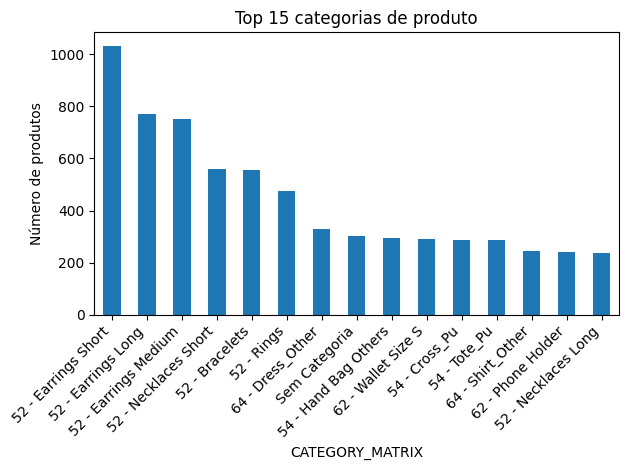

In [26]:
(df_prod["CATEGORY_MATRIX"]
 .value_counts()
 .head(15)
 .plot(kind="bar"))

plt.title("Top 15 categorias de produto")
plt.ylabel("Número de produtos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [27]:
df_prod["CATEGORY_MATRIX_BUYER"].value_counts().head(15)

CATEGORY_MATRIX_BUYER
52 - Earrings Short     1033
52 - Earrings Long       769
52 - Earrings Medium     751
52 - Necklaces Short     559
52 - Bracelets           557
54 - Cross               554
52 - Rings               444
54 - Tote                436
Sem Categoria            303
64 - Dress_Other         302
54 - Hand Bag Others     295
62 - Wallet Size S       292
62 - Phone Holder        239
52 - Necklaces Long      236
64 - Trousers_Other      216
Name: count, dtype: int64

In [44]:
(df_prod["CATEGORY_MATRIX"] != df_prod["CATEGORY_MATRIX_BUYER"]).sum()

1654

In [45]:
df_prod[df_prod["CATEGORY_MATRIX"] != df_prod["CATEGORY_MATRIX_BUYER"]][["CATEGORY_MATRIX", "CATEGORY_MATRIX_BUYER"]].value_counts().head(20)

CATEGORY_MATRIX            CATEGORY_MATRIX_BUYER   
54 - Cross_Pu              54 - Cross                  288
54 - Tote_Pu               54 - Tote                   287
54 - Cross_Nylon           54 - Cross                  105
Dress                      Sem Categoria               102
54 - Tote_Nylon            54 - Tote                    71
54 - Backpack_Pu           54 - Backpack                53
54 - Backpack_Nylon        54 - Backpack                48
Shirt                      Sem Categoria                48
54 - Cross_Straw           54 - Cross                   42
54 - Cross_Fur/Suede       54 - Cross                   38
Cardigan                   Sem Categoria                36
54 - Briefcase_Pu          54 - Briefcase               36
54 - Cross_Multicolour     54 - Cross                   35
54 - Backpack_Multicolour  54 - Backpack                33
52 - Rings                 52 - Rings U                 32
Sweater                    Sem Categoria                28
64 -

In [28]:
df_prod["FASHIONTYPE_ASIS"].value_counts(dropna=False)

FASHIONTYPE_ASIS
Fashion                4652
Fashion Basic          2250
Basic                  2165
Commercial Online       429
Capsule                 296
Maxi                    275
Plus Closet             200
Passerelle              105
Continuity               64
Campaign                 55
Provision                31
Exclusive Jewellery      24
Image                     9
Name: count, dtype: int64

In [29]:
df_prod["COLLECTION_TYPE"].value_counts(dropna=False)

COLLECTION_TYPE
Core Collection                   8895
Exclusive Online                   590
Set                                413
Online                             147
Other Specific                     142
Limited Edition                    102
Online + Lojas Imagem               83
Online + Lojas Imagem Próprias      64
Leather                             55
Hot                                 24
Ramadan                             21
Leather Plus                        15
Arabe                                4
Name: count, dtype: int64

In [38]:
sem_cat = df_prod[df_prod["CATEGORY_MATRIX"] == "Sem Categoria"].copy()
sem_cat.shape[0]

303

In [39]:
sem_cat["PROD_DES"].value_counts().head(20)

PROD_DES
Dress BRIDAL CAPSULE Neutral Multicolor U              7
Dress ESSENTIALS T DISPLAY 1 Bright Multicolor U       5
Dress Luna Bright Multicolor U                         3
Dress SUMMER BW CAPSULE Black U                        3
Cardigan KUSAMA Bright Multicolor U                    3
Dress TORANJA Bright Multicolor U                      3
Dress TUSCA Bright Multicolor U                        3
Shirt LAB JUNHO  Bright Multicolor U                   2
Shirt HOT Ecru U                                       2
Dress LOVEBOX4 Bright Multicolor U                     2
Dress ESSENTIALS T DISPLAY 1 Turquoise U               2
Cardigan ESSENTIALS T DISPLAY 1 Bright Multicolor U    2
Dress ESSENTIALS T DISPLAY 1 Green U                   2
Dress BLACKWHITE White U                               2
Cardigan AMI Bright Multicolor U                       2
Dress BLACKWHITE Black U                               2
Top MADEIRA Bright Multicolor U                        2
Shirt BLACKWHITE Black

In [40]:
sem_cat[["L1_DES", "L2_DES", "L3_DES", "L4_DES"]].value_counts().head(15)

L1_DES   L2_DES   L3_DES          L4_DES    
TEXTILE  Apparel  TOPS            Dress         102
                                  Shirt          48
                                  Cardigan       36
                                  Sweater        28
                  PONCHO+QUIMONO  Coat           27
                  TOPS            Top            22
                  OTHERS          Raincoat       11
                  TOPS            Vest           10
                  OTHERS          Sweatshirt      6
                  BOTTOMS         Shorts          5
                                  Trousers        3
                                  Skirt           2
                                  Jumpsuit        1
                  OTHERS          Jeans           1
                  TOPS            Blouse          1
Name: count, dtype: int64

In [41]:
sem_cat[["PROD_CLR_EQUIV", "PROD_DES",]].sample(10, random_state=42)

,PROD_CLR_EQUIV,PROD_DES
4135,213870_EC,Coat WinterCapsuleOutubro Ecru U
8492,214941_BG,Coat MISSY Beige U
3054,212079_KK,Dress LAB JUNHO Khaki U
976,215856_AN,Sweater T3 EARTH Anthracite U
3884,210789_TQ,Dress ESSENTIALS T DISPLAY 1 Turquoise U
10029,206936_EC,Shirt BLACKWHITE Ecru U
2467,212224_RD,Dress MAXI MAIO Red U
15735,214888_BK,Coat JUPITER Black U
240,216969_BU,Dress Maxi nov Burgundy U
10104,209846_BM,Shirt VIMBA Bright Multicolor U


In [42]:
#Identify those "sem categoria"
mask_sem_cat = df_prod["CATEGORY_MATRIX"] == "Sem Categoria"

#Impute based on L4_DES
df_prod.loc[mask_sem_cat, "CATEGORY_MATRIX"] = df_prod.loc[mask_sem_cat, "L4_DES"]

(df_prod["CATEGORY_MATRIX"] == "Sem Categoria").sum()

0

In [30]:
#Colors

In [31]:
df_prod["CLR_DES"].value_counts().head(10)

CLR_DES
Black                  1164
Bright Multicolor      1047
Gold                   1002
Halftone Multicolor     761
Silver                  587
Ecru                    577
Blue                    495
White                   373
Green                   336
Khaki                   302
Name: count, dtype: int64

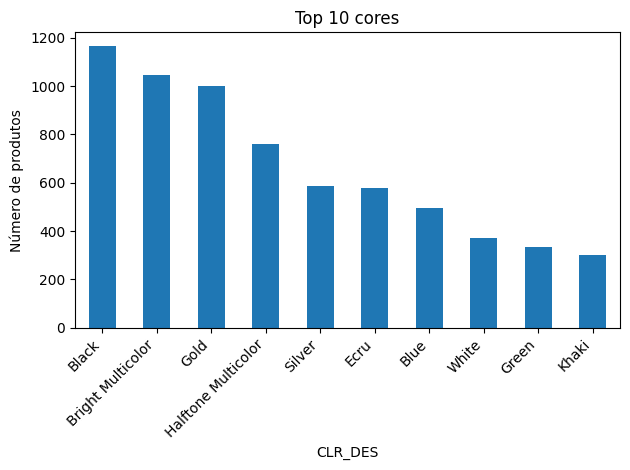

In [32]:
(df_prod["CLR_DES"]
 .value_counts()
 .head(10)
 .plot(kind="bar"))

plt.title("Top 10 cores")
plt.ylabel("Número de produtos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [68]:
#Cores mais comuns numa categoria específica (ex: “Earrings”)
earrings = df_prod[df_prod["CATEGORY_MATRIX"].str.contains("EARRINGS", case=False, na=False)]
earrings["CLR_DES"].value_counts().head(10)

CLR_DES
Gold                   525
Halftone Multicolor    409
Silver                 291
Bright Multicolor      237
Black                  100
Blue                    97
White                   80
Dark Multicolor         77
Midnight Blue           63
Ivory                   59
Name: count, dtype: int64

In [33]:
#Sizes

In [34]:
df_prod["SZ_DES"].value_counts().head(10)

SZ_DES
U       4572
M       1798
L       1028
S        825
M/L      780
XS/S     652
XL       159
XS       127
XXS      111
36       106
Name: count, dtype: int64

In [35]:
#Exploring numerical variables (price)

In [36]:
df_prod["PRICE_BASE_W_VAT"].describe()

count    10555.000000
mean        20.520184
std         15.695110
min          3.990000
25%          7.990000
50%         15.990000
75%         27.990000
max        250.000000
Name: PRICE_BASE_W_VAT, dtype: float64

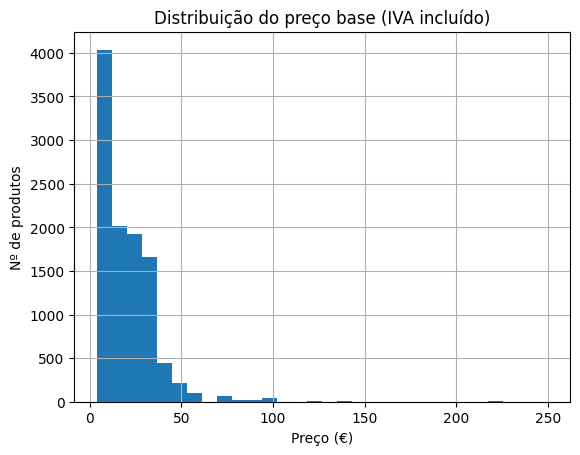

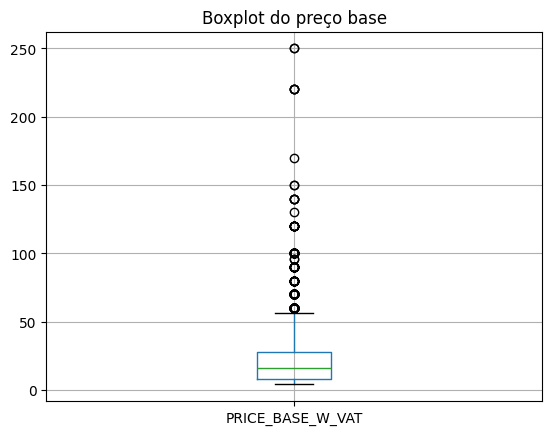

In [37]:
df_prod["PRICE_BASE_W_VAT"].hist(bins=30)
plt.title("Distribuição do preço base (IVA incluído)")
plt.xlabel("Preço (€)")
plt.ylabel("Nº de produtos")
plt.show()

df_prod.boxplot(column="PRICE_BASE_W_VAT")
plt.title("Boxplot do preço base")
plt.show()

In [43]:
df_prod[df_prod["PRICE_BASE_W_VAT"] > 150][
    ["PROD_CLR_EQUIV", "PROD_DES", "CATEGORY_MATRIX", "PRICE_BASE_W_VAT"]
].head()

,PROD_CLR_EQUIV,PROD_DES,CATEGORY_MATRIX,PRICE_BASE_W_VAT
9309,223997_NM,Dress BRIDAL CAPSULE Neutral Multicolor U,Dress,220.0
15001,226739_NM,Dress BRIDAL CAPSULE Neutral Multicolor U,Dress,170.0
15545,226740_NM,Dress BRIDAL CAPSULE Neutral Multicolor U,Dress,220.0
9297,226741_NM,Dress BRIDAL CAPSULE Neutral Multicolor U,Dress,250.0
9574,226742_NM,Dress BRIDAL CAPSULE Neutral Multicolor U,Dress,250.0


In [46]:
#Average price by category
price_by_cat = (
    df_prod
    .groupby("CATEGORY_MATRIX")["PRICE_BASE_W_VAT"]
    .agg(["count", "mean", "min", "max"])
    .sort_values("count", ascending=False)
    .head(10)
)

price_by_cat

,count,mean,min,max
CATEGORY_MATRIX,,,,
52 - Earrings Short,1033,6.622139,3.99,35.99
52 - Earrings Long,769,10.745527,5.99,35.99
52 - Earrings Medium,751,7.923422,4.99,39.99
52 - Necklaces Short,559,15.188569,7.99,95.99
52 - Bracelets,557,8.533986,5.99,29.99
52 - Rings,476,7.351345,4.99,29.99
64 - Dress_Other,329,35.929210,19.99,89.99
54 - Hand Bag Others,295,29.610339,4.99,69.99
62 - Wallet Size S,292,13.613288,9.99,23.99


In [47]:
#Save dataset clean

In [48]:
df_prod.to_csv("df_product_clean.csv", index=False, encoding="utf-8-sig")